In [1]:
import pandas as pd
from modlamp.descriptors import GlobalDescriptor
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
def get_mw(sequence):
    """Molecular Weight"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.calculate_MW(amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_isoelectric_point(sequence):
    """Isoelectric point"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.isoelectric_point(amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_charge_density(sequence):
    """Charge density"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.charge_density(ph=7, amide=True)
        return round(desc.descriptor[0][0], 5)
    except:
        return None

def get_charge(sequence):
    """Charge"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.calculate_charge(ph=7, amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_instability_index(sequence):
    """Instability index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.instability_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_aromaticity(sequence):
    """Aromaticity"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.aromaticity()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_aliphatic_index(sequence):
    """Aliphatic index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.aliphatic_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_boman_index(sequence):
    """Boman index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.boman_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_hydrophobic_ratio(sequence):
    """Hydrophobic ratio"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.hydrophobic_ratio()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

In [4]:
df_data = pd.read_csv("../PET/raw_dataset.csv")
df_data

,sequence,response
0,MNTTPVHALTDIDGGIAVDPAPRLAGPPVFGGPGNDAFDLAPVRST...,0
1,LTCGTNSGFVCKGTQTQYAGGFAPGVGYGGFGGGSCTATKTPVIFI...,0
2,AANPYERGPNPTDALLEARSGPFSVSEENVSRLSASGFGGGTIYYP...,1
3,MIKPVTFMSEGEQIIGVLHVPDDLRGDKRAPAIAMFHGFTGNKSEA...,1
4,MKFFALTTLLAATASALPTSHPVQELEARQLGGGTTRNDLTNGNSA...,0
...,...,...
423,MANPYERGPNPTDALLEASSGPFSVSEENVSRLSASGFGGGTIYYP...,1
424,MFGKLPFARASLAVGALLLSAAAVAQTNPYQRGPDPTVSSLEATRG...,1
425,MKKNLNKIATIILLVFSMTLTNFSMIVRAAEPKAQGTQKVESSTTK...,1
426,MLYHAYQIYADMILPACTLAELAAATLAANPRSGGFDAVPRLRAAC...,0


In [5]:
molecular_weigth = []
isoelectric_point_list = []
hydrophobic_list = []

for index in df_data.index:
    molecular_weigth.append(
        get_mw(df_data["sequence"][index])
    )

    isoelectric_point_list.append(
        get_isoelectric_point(df_data["sequence"][index])
    )

    hydrophobic_list.append(
        get_hydrophobic_ratio(df_data["sequence"][index])
    )

df_data["mw"] = molecular_weigth
df_data["isoelectric_point"] = isoelectric_point_list
df_data["hydrophobic_ratio"] = hydrophobic_list

<Axes: xlabel='isoelectric_point'>

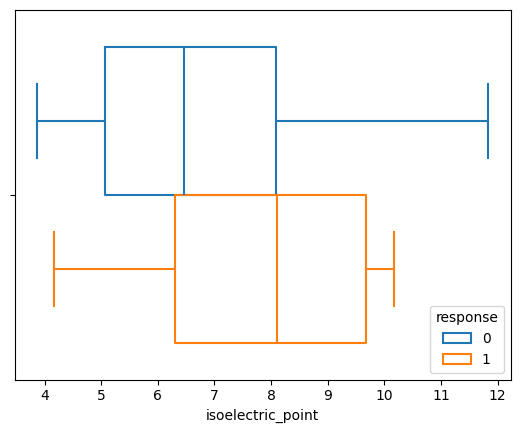

In [21]:
sns.boxplot(data=df_data, x="isoelectric_point", hue="response", fill=False)

<Axes: xlabel='isoelectric_point', ylabel='mw'>

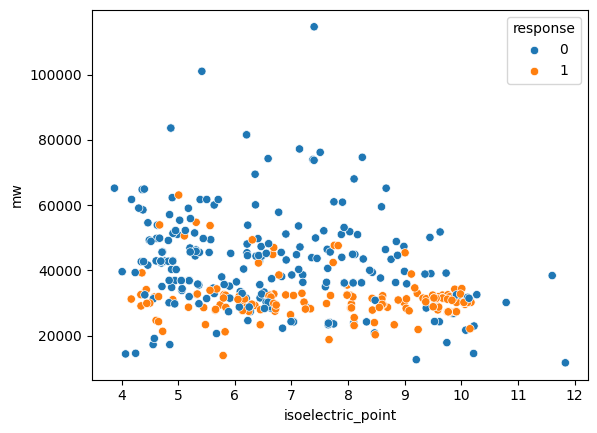

In [24]:
sns.scatterplot(data=df_data, x="isoelectric_point", y="mw", hue="response")

In [7]:
df_data = df_data.drop(columns=["sequence"])
df_data

,response,mw,isoelectric_point,hydrophobic_ratio
0,0,36915.14,5.1915,0.4056
1,0,36158.87,8.0890,0.3304
2,1,28316.56,6.7202,0.3473
3,1,29424.53,5.7400,0.4122
4,0,23930.82,8.1001,0.3939
...,...,...,...,...
423,1,29369.69,6.7295,0.3407
424,1,30822.38,9.8337,0.3527
425,1,53735.22,5.5623,0.3167
426,0,44813.40,7.0884,0.4505


In [8]:
response = df_data["response"]
df_values = df_data.drop(columns=["response"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_values, response, test_size=.2, random_state=42)

In [10]:
scaler = MaxAbsScaler()
scaler.fit(X_train)

MaxAbsScaler()

In [11]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
rf_clf = RandomForestClassifier(
    random_state=42,
    n_estimators=100
)

rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [13]:
predictions = rf_clf.predict(X_test_scaled)

In [14]:
rf_clf.predict_proba(X_test_scaled)

array([[0.92, 0.08],
       [0.95, 0.05],
       [0.17, 0.83],
       [0.07, 0.93],
       [0.78, 0.22],
       [0.02, 0.98],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.69, 0.31],
       [0.57, 0.43],
       [0.87, 0.13],
       [0.17, 0.83],
       [0.17, 0.83],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.67, 0.33],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.42, 0.58],
       [0.98, 0.02],
       [0.45, 0.55],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.7 , 0.3 ],
       [0.04, 0.96],
       [0.11, 0.89],
       [1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.13, 0.87],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.64, 0.36],
       [0.  , 1.  ],
       [0.1 , 0.9 ],
       [0.67, 0.33],
       [0.89, 0.11],
       [0.45, 0.55],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.47, 0.53],
       [0.57, 0.43],
       [0.51,

In [15]:
confusion_matrix(y_true=y_test, y_pred=predictions)

array([[49,  5],
       [ 5, 27]])

In [16]:
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay

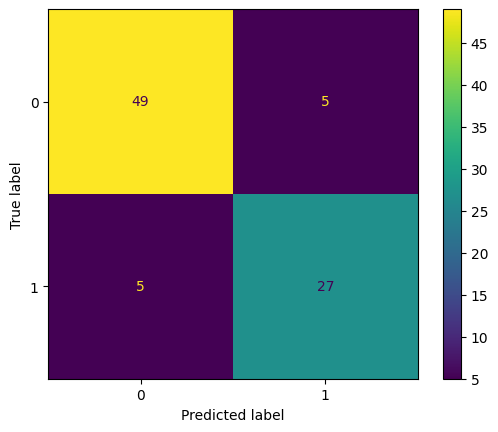

In [17]:
ConfusionMatrixDisplay.from_estimator(rf_clf, X=X_test_scaled, y=y_test)

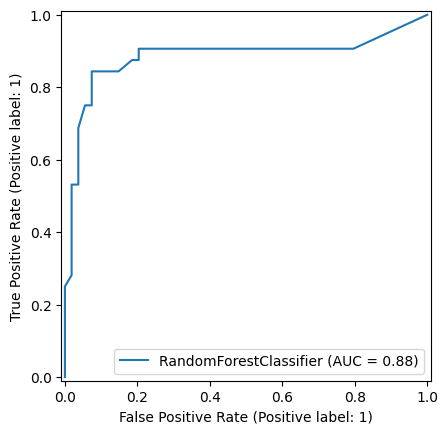

In [18]:
RocCurveDisplay.from_estimator(rf_clf, X=X_test_scaled, y=y_test)

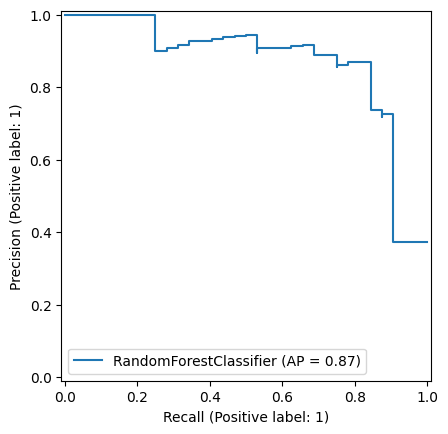

In [19]:
PrecisionRecallDisplay.from_estimator(rf_clf, X=X_test_scaled, y=y_test)